In [31]:
import numpy as np
area =   'France' # 'Scandinavia'
XX_rt_i = np.load(f'../../../Transfers/XX_rt_i_T5_{area}.npy')
XX_rt_Control = np.load(f'../../../Transfers/XX_rt_Control_T5_{area}.npy')
YY_rt_Control = np.load(f'../../../Transfers/YY_rt_Control_T5_{area}.npy')
mean_YY_rt_i = np.load(f'../../../Transfers/mean_YY_rt_i_T5_{area}.npy')
std_YY_rt_i = np.load(f'../../../Transfers/std_YY_rt_i_T5_{area}.npy')
XX_rt_Real100 = np.load(f'../../../Transfers/XX_rt_Real100_T5_{area}.npy')
YY_rt_Real100 = np.load(f'../../../Transfers/YY_rt_Real100_T5_{area}.npy')


Text(0, 0.5, 'temperature anomaly threshold $a_r$ (K)')

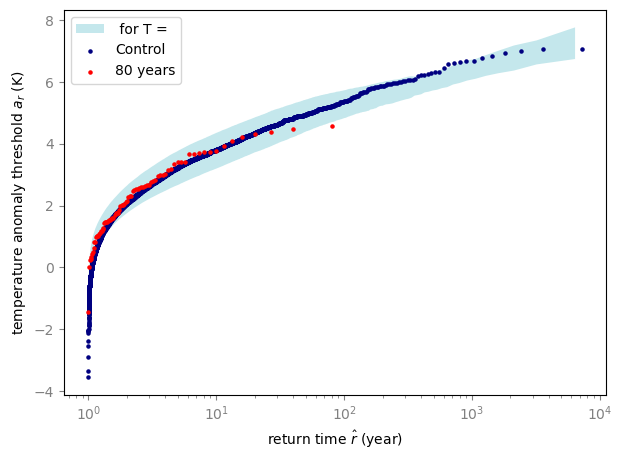

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from cycler import cycler

light_blue = (176/255, 224/255, 230/255)
dark_blue = (0, 0, 128/255)

light_green = (152/255, 251/255, 152/255)
dark_green = (0, 100/255, 0)

light_yellow = (255/255, 255/255, 153/255)
dark_orange = (255/255, 140/255, 0)

light_pink = (255/255, 192/255, 203/255)
dark_red = (139/255, 0, 0)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,5))
colors = cycler('color',
                [light_blue, dark_blue, light_green, dark_green,
                 light_yellow, dark_orange,light_pink, dark_red])
markers = cycler('marker', ['o', 's', 'D', 'v', '^', '>', '<', 'p'])

# Combine the two cyclers using the '+' operator
color_and_marker = colors + markers

plt.rc('axes', facecolor='white', edgecolor='black',
       axisbelow=True, grid=True, prop_cycle=color_and_marker)
plt.rc('grid', color='white', linestyle='dashed')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

ax.fill_between(XX_rt_i[0],mean_YY_rt_i-std_YY_rt_i,mean_YY_rt_i+std_YY_rt_i,alpha=0.75,label=f' for T = ')
ax.scatter(XX_rt_Control, YY_rt_Control, s=5,label=f"Control") 
ax.scatter(XX_rt_Real100, YY_rt_Real100, s=5,label=f"80 years", color='red')
       
        
ax.legend(loc="upper left")
ax.set_xscale('log')
ax.set_xlabel('return time $\hat{r}$ (year)')
ax.set_ylabel('temperature anomaly threshold $a_r$ (K)')
      

In [33]:
import skextremes as ske
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
data = ske.datasets.portpirie()

In [35]:
print(data.description)


    Annual Maximum Sea Levels at Port Pirie, South Australia
    --------------------------------------------------------

    Fields:
     year: numpy.array defining the year for the row data.
     sea_level: numpy.array defining annual maximum sea level recorded at
        Port Pirie, South Australia.
     
    Source:
     -Coles, S. G. (2001). An Introduction to Statistical Modelling of 
        Extreme Values. London: Springer.
    


In [36]:
data_array = data.asarray()
sea_levels = data.fields.sea_level
print(sea_levels)

[4.03 3.83 3.65 3.88 4.01 4.08 4.18 3.8  4.36 3.96 3.98 4.69 3.85 3.96
 3.85 3.93 3.75 3.63 3.57 4.25 3.97 4.05 4.24 4.22 3.73 4.37 4.06 3.71
 3.96 4.06 4.55 3.79 3.89 4.11 3.85 3.86 3.86 4.21 4.01 4.11 4.24 3.96
 4.21 3.74 3.85 3.88 3.66 4.11 3.71 4.18 3.9  3.78 3.91 3.72 4.   3.66
 3.62 4.33 4.55 3.75 4.08 3.9  3.88 3.94 4.33]


In [37]:
model = ske.models.classic.GEV(YY_rt_Real100, fit_method = 'mle', ci = 0.05,
                              ci_method = 'delta')

/Users/gmilosh/github/scikit-extremes/skextremes/models/classic.py:527: RuntimeWarning: divide by zero encountered in log
  sT = -_np.log(1.-self.frec/T)
/Users/gmilosh/github/scikit-extremes/skextremes/models/classic.py:527: RuntimeWarning: invalid value encountered in log
  sT = -_np.log(1.-self.frec/T)
/Users/gmilosh/github/scikit-extremes/skextremes/models/classic.py:546: RuntimeWarning: invalid value encountered in scalar subtract
  gradZ = [scale * (c**-2) * (1 - sT[i] ** (-c)) - scale * (c**-1) * (sT[i]**-c) * _np.log(sT[i]),


In [38]:
model.params


OrderedDict([('shape', 0.3619837907376556),
             ('location', 1.8121804303920983),
             ('scale', 1.2433278162368167)])

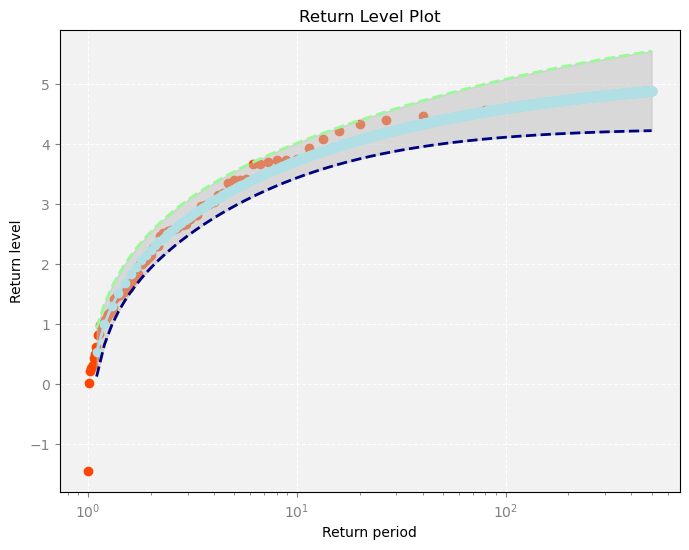

In [39]:
model.plot_return_values()
plt.show()

In [90]:
from pyextremes import get_extremes, get_return_periods

# Sample data
data = YY_rt_Real100

# Create Pandas Series object with numerical data
series = pd.Series(data)

# Compute start date and number of years
start_year = 2000
n_years = len(data)

# Create date range with annual frequency starting from July 1st of the start year
dates = pd.date_range(start=str(start_year)+'-07-01', periods=n_years, freq='AS-JUL')

# Create Pandas Series object with numerical data and date-time index
series = pd.Series(data, index=dates)

# Print the resulting series
print(series)

extremes = get_extremes(ts=series, method="BM", block_size='1Y', errors='ignore')
return_periods = get_return_periods(
    ts=series,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="1Y",
    return_period_size="1Y",
    plotting_position="weibull",
)
return_periods.sort_values("return period", ascending=False).head()

2000-07-01   -1.444740
2001-07-01    0.015050
2002-07-01    0.229271
2003-07-01    0.279180
2004-07-01    0.322825
                ...   
2075-07-01    4.219875
2076-07-01    4.332518
2077-07-01    4.396922
2078-07-01    4.473068
2079-07-01    4.563625
Freq: AS-JUL, Length: 80, dtype: float64


/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/block_maxima.py:79: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  block_size = pd.to_timedelta(block_size)
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/block_maxima.py:138: NoDataBlockWarning: 19 blocks contained no data
  warnings.warn(
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/return_periods.py:87: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  block_size = pd.to_timedelta(block_size)
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/return_periods.py:103: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  return_period_size = pd.to_timedel

,extreme values,exceedance probability,return period
date-time,,,
2079-07-01,4.563625,0.016393,61.000000
2077-07-01,4.396922,0.032787,30.500000
2076-07-01,4.332518,0.049180,20.333333
2075-07-01,4.219875,0.065574,15.250000
2073-07-01,3.936434,0.081967,12.200000


/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/block_maxima.py:79: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  block_size = pd.to_timedelta(block_size)
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/block_maxima.py:138: NoDataBlockWarning: 19 blocks contained no data
  warnings.warn(
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/eva.py:513: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  self.__extremes_kwargs["block_size"] = pd.to_timedelta(


(<Figure size 768x480 with 1 Axes>,
 <Axes: xlabel='date-time', ylabel='extreme values'>)

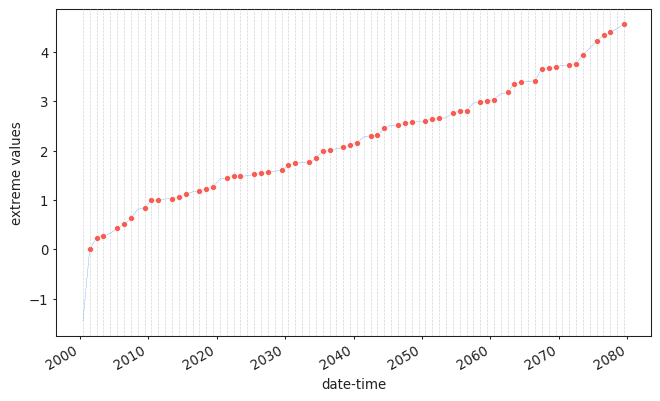

In [91]:
from pyextremes import EVA

model = EVA(series)
model.get_extremes(method="BM", block_size="1Y", errors='ignore')
model.plot_extremes()


In [92]:
model.fit_model()


In [100]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 200, 500, 1000],
    alpha=0.95,
    n_samples=100,
)
print(summary)


               return value  lower ci  upper ci
return period                                  
1.0                    -inf       NaN       NaN
2.0                2.199873  1.793587  2.632616
5.0                3.185288  2.780763  3.564105
10.0               3.689359  3.279906  3.964174
25.0               4.195600  3.808324  4.512986
50.0               4.495347  4.084383  5.017526
100.0              4.741316  4.258769  5.605757
200.0              4.944130  4.355820  6.122294
500.0              5.159302  4.440943  6.734486
1000.0             5.289822  4.485199  7.226104


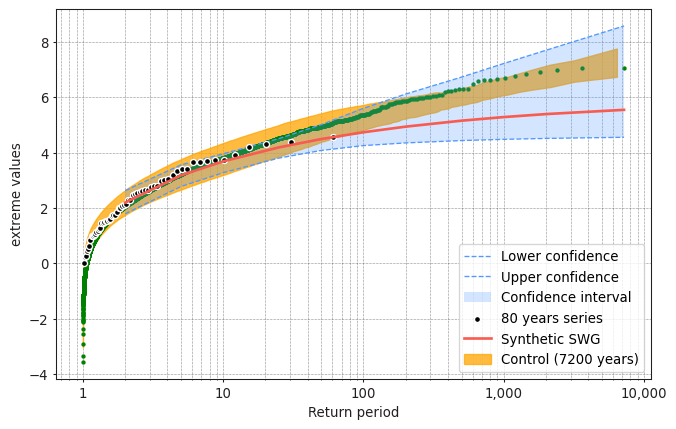

In [135]:
# model.plot_diagnostic(alpha=0.95)|
fig = model.plot_return_values(alpha=0.95,return_period=[1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 2000, 7200])
fig[1].fill_between(XX_rt_i[0],mean_YY_rt_i-std_YY_rt_i,mean_YY_rt_i+std_YY_rt_i,alpha=0.75,label=f' Synthetic SWG', color='orange')
fig[1].scatter(XX_rt_Control, YY_rt_Control, s=5,label=f"Control (7200 years)", color='green') 
        
fig[1].legend(loc="lower right", labels=['Lower confidence','Upper confidence','Confidence interval','80 years series','Synthetic SWG', 'Control (7200 years)'])

2000-07-01    3.741802
2001-07-01    3.205359
2002-07-01    3.171612
2003-07-01    2.989518
2004-07-01    2.814904
                ...   
2075-07-01    0.172896
2076-07-01    0.168509
2077-07-01   -0.064626
2078-07-01   -0.130767
2079-07-01   -0.135921
Freq: AS-JUL, Length: 80, dtype: float64


/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/block_maxima.py:79: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  block_size = pd.to_timedelta(block_size)
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/block_maxima.py:138: NoDataBlockWarning: 19 blocks contained no data
  warnings.warn(
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/return_periods.py:87: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  block_size = pd.to_timedelta(block_size)
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/return_periods.py:103: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  return_period_size = pd.to_timedel

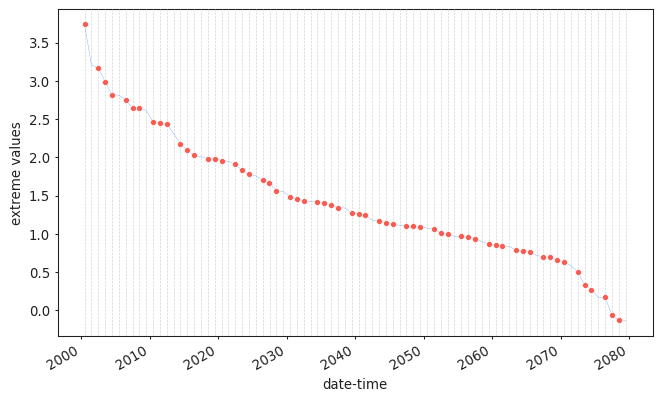

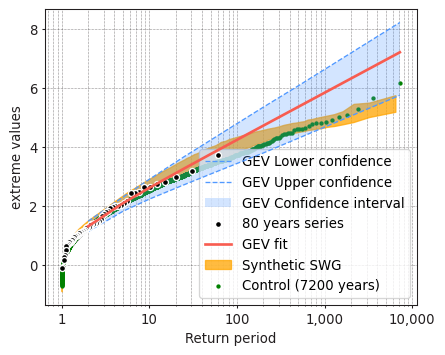

In [146]:
area =  'Scandinavia'
XX_rt_i = np.load(f'../../../Transfers/XX_rt_i_T5_{area}.npy')
XX_rt_Control = np.load(f'../../../Transfers/XX_rt_Control_T5_{area}.npy')
YY_rt_Control = np.load(f'../../../Transfers/YY_rt_Control_T5_{area}.npy')
mean_YY_rt_i = np.load(f'../../../Transfers/mean_YY_rt_i_T5_{area}.npy')
std_YY_rt_i = np.load(f'../../../Transfers/std_YY_rt_i_T5_{area}.npy')
XX_rt_Real100 = np.load(f'../../../Transfers/XX_rt_Real100_T5_{area}.npy')
YY_rt_Real100 = np.load(f'../../../Transfers/YY_rt_Real100_T5_{area}.npy')


# Sample data
data = YY_rt_Real100

# Create Pandas Series object with numerical data
series = pd.Series(data)

# Compute start date and number of years
start_year = 2000
n_years = len(data)

# Create date range with annual frequency starting from July 1st of the start year
dates = pd.date_range(start=str(start_year)+'-07-01', periods=n_years, freq='AS-JUL')

# Create Pandas Series object with numerical data and date-time index
series = pd.Series(data, index=dates)

# Print the resulting series
print(series)

extremes = get_extremes(ts=series, method="BM", block_size='1Y', errors='ignore')
return_periods = get_return_periods(
    ts=series,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="1Y",
    return_period_size="1Y",
    plotting_position="weibull",
)
return_periods.sort_values("return period", ascending=False).head()

model = EVA(series)
model.get_extremes(method="BM", block_size="1Y", errors='ignore')
model.plot_extremes()

model.fit_model()
# model.plot_diagnostic(alpha=0.95)|
fig = model.plot_return_values(alpha=0.95,return_period=[1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 2000, 7200], figsize=(5,4))
fig[1].fill_between(XX_rt_i[0],mean_YY_rt_i-std_YY_rt_i,mean_YY_rt_i+std_YY_rt_i,alpha=0.75,label=f' Synthetic SWG', color='orange')
fig[1].scatter(XX_rt_Control, YY_rt_Control, s=5,label=f"Control (7200 years)", color='green') 
        
fig[1].legend(loc="lower right", labels=['GEV Lower confidence','GEV Upper confidence','GEV Confidence interval','80 years series','GEV fit','Synthetic SWG', 'Control (7200 years)'])
fig[0].savefig(f'Images/GEV_vs_SWG_{area}.png', dpi=300, bbox_inches='tight')

2000-07-01    4.563625
2001-07-01    4.473068
2002-07-01    4.396922
2003-07-01    4.332518
2004-07-01    4.219875
                ...   
2075-07-01    0.322825
2076-07-01    0.279180
2077-07-01    0.229271
2078-07-01    0.015050
2079-07-01   -1.444740
Freq: AS-JUL, Length: 80, dtype: float64


/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/block_maxima.py:79: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  block_size = pd.to_timedelta(block_size)
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/block_maxima.py:138: NoDataBlockWarning: 19 blocks contained no data
  warnings.warn(
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/return_periods.py:87: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  block_size = pd.to_timedelta(block_size)
/Users/gmilosh/github/code/yes/envs/ew2/lib/python3.9/site-packages/pyextremes/extremes/return_periods.py:103: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  return_period_size = pd.to_timedel

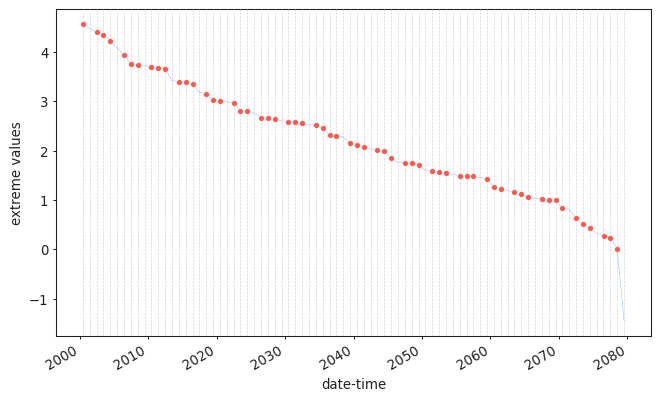

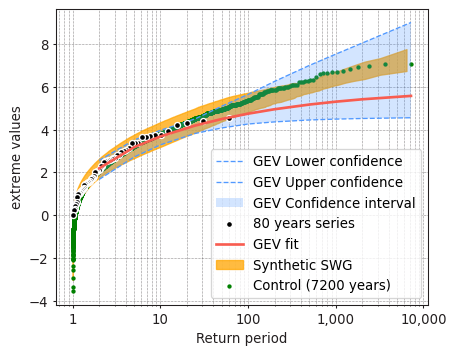

In [148]:
area =  'France'
XX_rt_i = np.load(f'../../../Transfers/XX_rt_i_T5_{area}.npy')
XX_rt_Control = np.load(f'../../../Transfers/XX_rt_Control_T5_{area}.npy')
YY_rt_Control = np.load(f'../../../Transfers/YY_rt_Control_T5_{area}.npy')
mean_YY_rt_i = np.load(f'../../../Transfers/mean_YY_rt_i_T5_{area}.npy')
std_YY_rt_i = np.load(f'../../../Transfers/std_YY_rt_i_T5_{area}.npy')
XX_rt_Real100 = np.load(f'../../../Transfers/XX_rt_Real100_T5_{area}.npy')
YY_rt_Real100 = np.load(f'../../../Transfers/YY_rt_Real100_T5_{area}.npy')


# Sample data
data = YY_rt_Real100

# Create Pandas Series object with numerical data
series = pd.Series(data)

# Compute start date and number of years
start_year = 2000
n_years = len(data)

# Create date range with annual frequency starting from July 1st of the start year
dates = pd.date_range(start=str(start_year)+'-07-01', periods=n_years, freq='AS-JUL')

# Create Pandas Series object with numerical data and date-time index
series = pd.Series(data, index=dates)

# Print the resulting series
print(series)

extremes = get_extremes(ts=series, method="BM", block_size='1Y', errors='ignore')
return_periods = get_return_periods(
    ts=series,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="1Y",
    return_period_size="1Y",
    plotting_position="weibull",
)
return_periods.sort_values("return period", ascending=False).head()

model = EVA(series)
model.get_extremes(method="BM", block_size="1Y", errors='ignore')
model.plot_extremes()

model.fit_model()
# model.plot_diagnostic(alpha=0.95)|
fig = model.plot_return_values(alpha=0.95,return_period=[1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 2000, 7200], figsize=(5,4))
fig[1].fill_between(XX_rt_i[0],mean_YY_rt_i-std_YY_rt_i,mean_YY_rt_i+std_YY_rt_i,alpha=0.75,label=f' Synthetic SWG', color='orange')
fig[1].scatter(XX_rt_Control, YY_rt_Control, s=5,label=f"Control (7200 years)", color='green') 
        
fig[1].legend(loc="lower right", labels=['GEV Lower confidence','GEV Upper confidence','GEV Confidence interval','80 years series','GEV fit','Synthetic SWG', 'Control (7200 years)'])

fig[0].savefig(f'Images/GEV_vs_SWG_{area}.png', dpi=300, bbox_inches='tight')